# **Classification of wine quality**


## 1. Exploratory data analysis
Objectives
- To check if there are any missing values
- To understand the data (basic statistics and correlation)

Conclusion
- No missing value
- Features are not significantly correlated
- The quality, y, is imbalanced

### Missing data

In [2027]:
import pandas as pd
import numpy as np

In [2028]:
# import data
data = pd.read_csv('WineQT.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [2029]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Explore data

In [2030]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [2031]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [2032]:
import seaborn as sns
from matplotlib import pyplot as plt

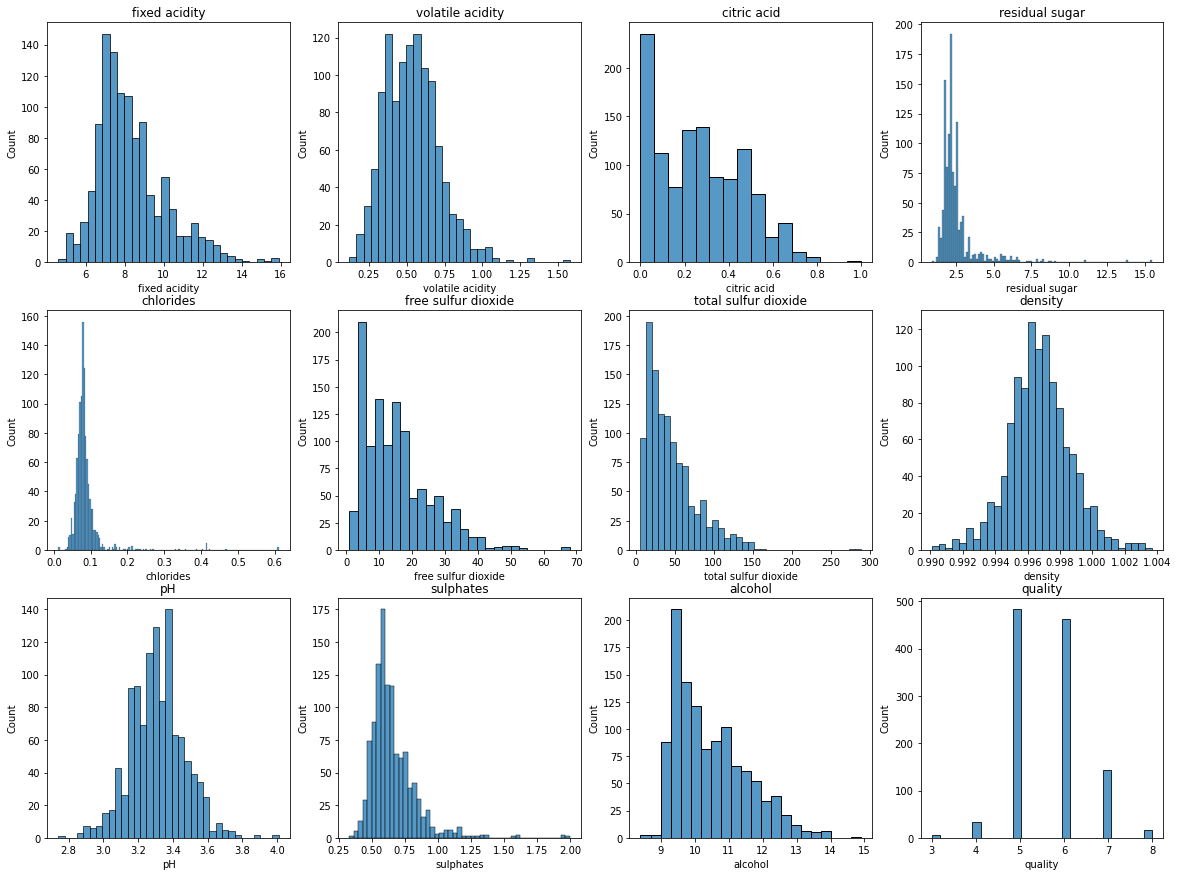

In [2033]:
fig, axes = plt.subplots(3,4,figsize=(20,15))
l = 0
for n in [0,1,2]:
    for m in [0,1,2,3]:
        sns.histplot(data[data.columns.tolist()[l]], ax=axes[n,m], label=str(data.columns.tolist()[l]))
        axes[n,m].title.set_text(str(data.columns.tolist()[l]))
        l+=1


In [2034]:
weight = data['quality'].value_counts().to_dict()
weight

{5: 483, 6: 462, 7: 143, 4: 33, 8: 16, 3: 6}

## A. Dataset X, y

### 2. Data wrangling
Objectives
- To create X, y datasets
- To create train and test datasets

Conclusions
- X, y train, validation and test data were created

In [2035]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2036]:
#Define a funciton to split the data into train and test set and standardize them
def std_split2_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=8)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [2037]:
#Define a funciton to split the data into train and test set and standardize them
def std_split3_data(X,y):
    X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3,random_state=8)
    X_cv, X_test, y_cv, y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=8)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_cv = scaler.transform(X_cv)
    X_test = scaler.transform(X_test)
    return X_train, X_cv, X_test, y_train, y_cv, y_test

In [2038]:
y = data['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [2039]:
X = data.drop(['quality','Id'], axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [2040]:
# Split and standardize data
X_train, X_test, y_train, y_test = std_split2_data(X,y)

### 3. Preliminary modeling
Objectives
- To fit several models
- To evaluate the models

Conclusions
- SVM: highest in test accuracy

In [2041]:
idx_list = ['K neighbors classifier','Logistic regression','Neural network','SVM','Tree']
cols = pd.MultiIndex.from_product([['A'],['Preliminary'],['Parameter','Best score','Test score']])
acc = pd.DataFrame(np.nan,columns=cols,index=idx_list)
acc.index.name = 'Model'
acc


A                      
                       Preliminary                      
                         Parameter Best score Test score
Model                                                   
K neighbors classifier         NaN        NaN        NaN
Logistic regression            NaN        NaN        NaN
Neural network                 NaN        NaN        NaN
SVM                            NaN        NaN        NaN
Tree                           NaN        NaN        NaN

#### Define useful functions

In [2042]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2043]:
#Define a function to plot learning curve
def plot_learning_curve(model,X,y):
    train_size, train_score, test_score = learning_curve(model,X,y,random_state=10)
    plt.figure()
    plt.plot(train_size, train_score.mean(1), "ro-", label='train score')
    plt.plot(train_size, test_score.mean(1), "bo-", label='test score')
    plt.xlabel("Train size")
    plt.ylabel("Accuracy score")
    plt.title("Learning curve")
    plt.ylim(top=1.01)
    plt.legend(bbox_to_anchor = (1,1))
    plt.show()

#### K neighbors classifier

In [2044]:
#Get the best parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = std_split2_data(X,y)
model = KNeighborsClassifier()
parameters = {'n_neighbors':[5,6,7,8,9,10,11,12]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['K neighbors classifier',('A','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['K neighbors classifier',('A','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'n_neighbors': 9} and the best score is 0.5755238259403967


Model test accuracy: 0.611353711790393


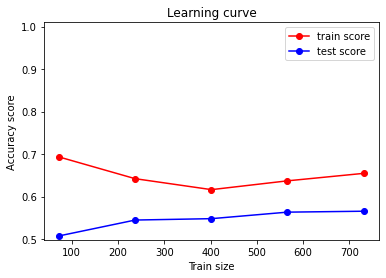

In [2045]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['K neighbors classifier',('A','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Logistic regression

In [2046]:
#Get the best parameters
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = std_split2_data(X,y)
model = LogisticRegression()
parameters = {'C':[0.1,1,10], 'multi_class':['multinomial'], 'max_iter':[400]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['Logistic regression',('A','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['Logistic regression',('A','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'C': 1, 'max_iter': 400, 'multi_class': 'multinomial'} and the best score is 0.5886051099364131


Model test accuracy: 0.5938864628820961


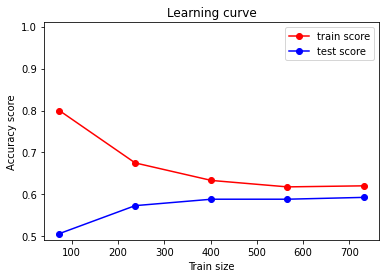

In [2047]:
model = LogisticRegression(C=1,multi_class='multinomial')
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['Logistic regression',('A','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Neural network modeling

In [2048]:
#Get the best parameters
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = std_split2_data(X,y)
model = MLPClassifier()
parameters = {'alpha':[0.01,0.1,1,10,100],'hidden_layer_sizes':[8,13,18,23],'activation':['logistic'],'solver':['lbfgs'],'max_iter':[5000]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['Neural network',('A','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['Neural network',('A','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_, model_bp.best_score_))

The best parameter is {'activation': 'logistic', 'alpha': 1, 'hidden_layer_sizes': 13, 'max_iter': 5000, 'solver': 'lbfgs'} and the best score is 0.6072119436144947


Model test accuracy: 0.6768558951965068


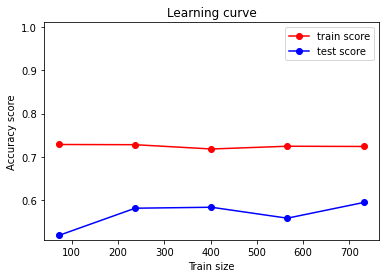

In [2198]:
model = MLPClassifier(alpha=1, hidden_layer_sizes=13, activation='logistic', solver='lbfgs', max_iter=5000)
model.fit(X_train,y_train)
i = 0
score_NN = []
while i < 30:
    predicted_y = model.predict(X_test)
    score_NN.append(accuracy_score(y_test, predicted_y))
    i += 1
score_avg_NN = sum(score_NN)/len(score_NN)
acc.loc['Neural network',('A','Preliminary','Test score')] = score_avg_NN
print('Model test accuracy:', score_avg_NN)
plot_learning_curve(model,X_train,y_train)

#### SVM modeling

In [2050]:
#Get the best parameters
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = std_split2_data(X,y)
model = SVC()
parameters = {'C':[0.01,0.1,1,10,100], 'kernel':['sigmoid','rbf','linear']}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['SVM',('A','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['SVM',('A','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'C': 10, 'kernel': 'rbf'} and the best score is 0.6138387726959319


Model test accuracy: 0.6637554585152838


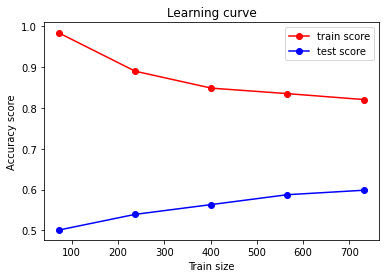

In [2051]:
model = SVC(C=10)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['SVM',('A','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Tree modeling

In [2052]:
#Get the best parameters
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = std_split2_data(X,y)
model = DecisionTreeClassifier()
parameters = {'max_depth':[3,4,5,6,7,8,9,10]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['Tree',('A','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['Tree',('A','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'max_depth': 3} and the best score is 0.5645493373170919


Model test accuracy: 0.5676855895196506


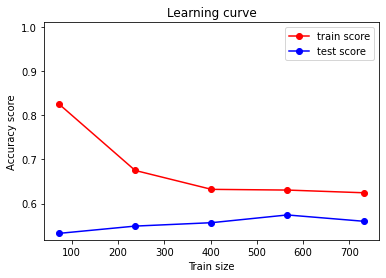

In [2053]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['Tree',('A','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Accuracy table

In [2054]:
#Obtain a table of accuracies of each model
acc.loc(axis=1)[:,:,'Test score']


,A
,Preliminary
,Test score
Model,
K neighbors classifier,0.611354
Logistic regression,0.593886
Neural network,0.624454
SVM,0.663755
Tree,0.567686


### 4. Modeling with polynomial featured data
Objectives
- To train the underfit models in addition of polynomial features
- To apply and obtain the best parameter and polynomial index of each model

Conclusions
- Logistic regression and neural network: improves significantly in test accuracy
- Overfit models drop in test accuracy as expected

In [2055]:
cols = pd.MultiIndex.from_product([['A'],['Polynomial'],['Polynomial index','Parameter','Train score','Validation score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                                         \
                                                   Polynomial             
                       Best score Test score Polynomial index Parameter   
Model                                                                     
K neighbors classifier   0.575524   0.611354              NaN       NaN   
Logistic regression      0.588605   0.593886              NaN       NaN   
Neural network           0.607212   0.624454              NaN       NaN   
SVM                      0.613839   0.663755              NaN       NaN   
Tree                     0.564549   0.567686              NaN       NaN   

                                                                
                                                                
                       Train score Validation score Test score  
Model                                                           
K neighbors classifier         NaN              NaN        NaN  
Logistic regression            NaN              NaN        NaN  
Neural network                 NaN              NaN        NaN  
SVM                            NaN              NaN        NaN  
Tree                           NaN              NaN        NaN

#### Define useful functions

In [2056]:
#Define a function to record the accuracy scores with their respective parameters
def create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score):
    info = {'Polynomial index':polynomial_index,'Hyperparameter':hyperparameter,'Train score':train_score,'Validation score':validation_score,'Test score':test_score}
    score = pd.DataFrame(info,index=None)
    return score

In [2057]:
#Define a functoon to plot validation curve
def plot_validation_curve(score,P):
    plt.figure()
    color_list = ['b','r','g','c','y','m','k','w']
    for i,p in enumerate(P):
        plt.plot(score[score['Hyperparameter']==p]['Polynomial index'], score[score['Hyperparameter']==p]['Train score'], 'o-', color = color_list[i], label=('Train score, p={0}'.format(p)))
        plt.plot(score[score['Hyperparameter']==p]['Polynomial index'], score[score['Hyperparameter']==p]['Validation score'], 'o--', color = color_list[i], label=('Validation score, p={0}'.format(p)))
    plt.xlabel('Polynomial index')
    plt.ylabel('Accuracy')
    plt.title('Validation curve')
    plt.legend(bbox_to_anchor=(1,1))
    plt.ylim(top=1.01)
    plt.show()
    plt.close()

In [2058]:
from sklearn.preprocessing import PolynomialFeatures

#### K neighbors classifier modeling

In [2059]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [5,6,7,8,9,10]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n,include_bias=False)
        X_poly = poly.fit_transform(X)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = KNeighborsClassifier(p)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 5 combination run is completed
2 6 combination run is completed
2 7 combination run is completed
2 8 combination run is completed
2 9 combination run is completed
2 10 combination run is completed
3 5 combination run is completed
3 6 combination run is completed
3 7 combination run is completed
3 8 combination run is completed
3 9 combination run is completed
3 10 combination run is completed
4 5 combination run is completed
4 6 combination run is completed
4 7 combination run is completed
4 8 combination run is completed
4 9 combination run is completed
4 10 combination run is completed


In [2060]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['K neighbors classifier',('A','Polynomial','Parameter')] = str({'n_neighbors':bp['Hyperparameter'][0]})
acc.loc['K neighbors classifier',('A','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['K neighbors classifier',('A','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['K neighbors classifier',('A','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['K neighbors classifier',('A','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
4,2,9,0.64625,0.561404,0.616279
0,2,5,0.69375,0.549708,0.616279
14,4,7,0.67375,0.549708,0.598837


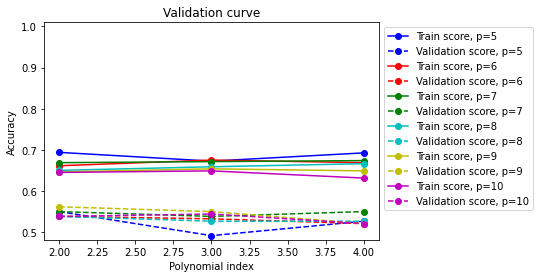

In [2061]:
#Plot validation curve
plot_validation_curve(score,P)

#### Logistic regression modeling

In [2062]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [0.1,1,10,100]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = LogisticRegression(C=p, solver="lbfgs", multi_class='multinomial', max_iter=10000)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 0.1 combination run is completed
2 1 combination run is completed
2 10 combination run is completed
2 100 combination run is completed
3 0.1 combination run is completed
3 1 combination run is completed
3 10 combination run is completed
3 100 combination run is completed
4 0.1 combination run is completed
4 1 combination run is completed
4 10 combination run is completed
4 100 combination run is completed


In [2063]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Logistic regression',('A','Polynomial','Parameter')] = str({'C':bp['Hyperparameter'][0],'solver':'lbfgs','multi_class':'multinomial','max_iter':10000})
acc.loc['Logistic regression',('A','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Logistic regression',('A','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['Logistic regression',('A','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Logistic regression',('A','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
7,3,100.0,0.81500,0.584795,0.563953
11,4,100.0,0.90000,0.584795,0.552326
0,2,0.1,0.63375,0.578947,0.633721


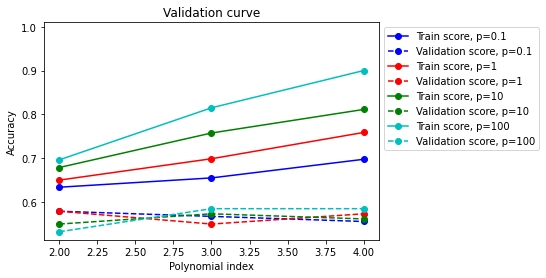

In [2064]:
#Plot validation curve
plot_validation_curve(score,P)

#### Neural network modeling

In [2065]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [8,13,18,23]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = MLPClassifier(solver='lbfgs',activation='logistic', hidden_layer_sizes=(p,), max_iter=3000)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        i = 0
        NN_train = []
        NN_cv = []
        NN_test = []
        while i < 30:
            predicted_y = model.predict(X_train)
            NN_train.append(accuracy_score(y_train, predicted_y))
            predicted_y = model.predict(X_cv)
            NN_cv.append(accuracy_score(y_cv, predicted_y))
            predicted_y = model.predict(X_test)
            NN_test.append(accuracy_score(y_test, predicted_y))
            i += 1
        train_score.append(sum(NN_train)/len(NN_train))
        validation_score.append(sum(NN_cv)/len(NN_cv))
        test_score.append(sum(NN_test)/len(NN_test))
        print(n,p, 'combination run is completed')


2 8 combination run is completed
2 13 combination run is completed
2 18 combination run is completed
2 23 combination run is completed
3 8 combination run is completed
3 13 combination run is completed
3 18 combination run is completed
3 23 combination run is completed
4 8 combination run is completed
4 13 combination run is completed
4 18 combination run is completed
4 23 combination run is completed


In [2066]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Neural network',('A','Polynomial','Parameter')] = str({'hidden_layer_sizes':bp['Hyperparameter'][0],'solver':'lbfgs','activation':'logistic','max_iter':3000})
acc.loc['Neural network',('A','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Neural network',('A','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['Neural network',('A','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Neural network',('A','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
10,4,18,0.93625,0.619883,0.622093
11,4,23,0.95375,0.619883,0.581395
1,2,13,0.91000,0.602339,0.558140


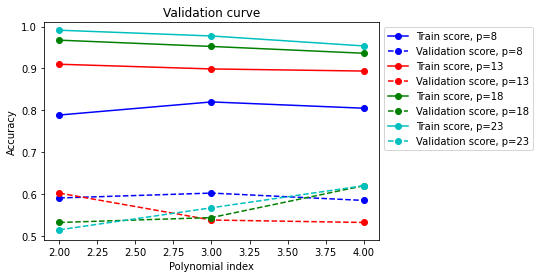

In [2067]:
#Plot validation curve
plot_validation_curve(score,P)

#### SVM modeling

In [2068]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [1,3,10,30,100,300]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = SVC(C=p, kernel="rbf", gamma='auto')
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 1 combination run is completed
2 3 combination run is completed
2 10 combination run is completed
2 30 combination run is completed
2 100 combination run is completed
2 300 combination run is completed
3 1 combination run is completed
3 3 combination run is completed
3 10 combination run is completed
3 30 combination run is completed
3 100 combination run is completed
3 300 combination run is completed
4 1 combination run is completed
4 3 combination run is completed
4 10 combination run is completed
4 30 combination run is completed
4 100 combination run is completed
4 300 combination run is completed


In [2069]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['SVM',('A','Polynomial','Parameter')] = str({'C':bp['Hyperparameter'][0],'kernel':'rbf','gamma':'auto'})
acc.loc['SVM',('A','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['SVM',('A','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['SVM',('A','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['SVM',('A','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
9,3,30,0.83125,0.637427,0.656977
3,2,30,0.85750,0.631579,0.633721
16,4,100,0.85875,0.608187,0.633721


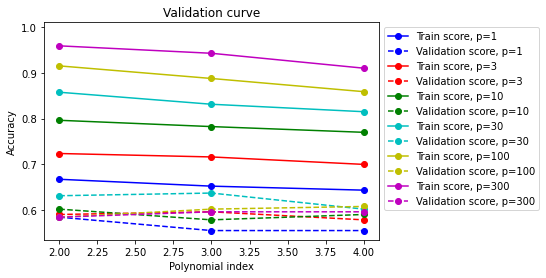

In [2070]:
#Plot validation curve
plot_validation_curve(score,P)

#### Tree modeling

In [2071]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [5,6,7,8]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = DecisionTreeClassifier(max_depth=p)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 5 combination run is completed
2 6 combination run is completed
2 7 combination run is completed
2 8 combination run is completed
3 5 combination run is completed
3 6 combination run is completed
3 7 combination run is completed
3 8 combination run is completed
4 5 combination run is completed
4 6 combination run is completed
4 7 combination run is completed
4 8 combination run is completed


In [2072]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Tree',('A','Polynomial','Parameter')] = str({'max_depth':bp['Hyperparameter'][0]})
acc.loc['Tree',('A','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Tree',('A','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['Tree',('A','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Tree',('A','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
9,4,6,0.800,0.608187,0.587209
10,4,7,0.855,0.590643,0.593023
2,2,7,0.805,0.584795,0.593023


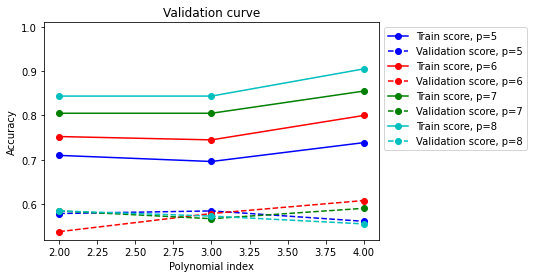

In [2073]:
#Plot validation curve
plot_validation_curve(score,P)

#### Accuracy table

In [2074]:
acc.loc(axis=1)[:,:,'Test score']

A           
                       Preliminary Polynomial
                        Test score Test score
Model                                        
K neighbors classifier    0.611354   0.616279
Logistic regression       0.593886   0.633721
Neural network            0.624454   0.552326
SVM                       0.663755   0.645349
Tree                      0.567686   0.558140

### 5. Further modeling with weighting
- To fit several models with weighting
- To evaluate the models with weighting

Conclusions
- Only K neighbors classifier improves significantly and highest in test accuracy

In [2075]:
cols = pd.MultiIndex.from_product([['A'],['Weighting'],['Parameter','Best score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                          \
                                                               Weighting   
                       Train score Validation score Test score Parameter   
Model                                                                      
K neighbors classifier     0.69375         0.549708   0.616279       NaN   
Logistic regression        0.63375         0.578947   0.633721       NaN   
Neural network             0.78875         0.590643   0.552326       NaN   
SVM                        0.66750         0.584795   0.645349       NaN   
Tree                       0.71000         0.578947   0.558140       NaN   

                                              
                                              
                       Best score Test score  
Model                                         
K neighbors classifier        NaN        NaN  
Logistic regression           NaN        NaN  
Neural network                NaN        NaN  
SVM                           NaN        NaN  
Tree                          NaN        NaN

#### K neighbors classifier

In [2076]:
#Get the best parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = std_split2_data(X,y)
model = KNeighborsClassifier()
parameters = {'weights':['distance'],'n_neighbors':[5,6,7,8,9,10,11,12]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

#Record the best parameter and score
acc.loc['K neighbors classifier',('A','Weighting','Parameter')] = str(model_bp.best_params_)
acc.loc['K neighbors classifier',('A','Weighting','Best score')] = model_bp.best_score_

The best parameter is {'n_neighbors': 11, 'weights': 'distance'} and the best score is 0.6203889910365433


Model test accuracy: 0.6812227074235808


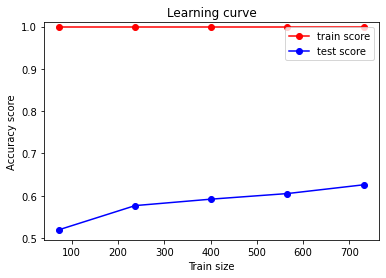

In [2077]:
#Evaluate the model and plot learning curve
model = KNeighborsClassifier(n_neighbors = 11, weights='distance')
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['K neighbors classifier',('A','Weighting','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Logistic regression

In [2078]:
#Get the best parameters
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = std_split2_data(X,y)
model = LogisticRegression()
parameters = {'class_weight':[weight],'C':[0.1,1,10],'multi_class':['multinomial'],'max_iter':[10000]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

#Record the best parameter and score
acc.loc['Logistic regression',('A','Weighting','Parameter')] = str(model_bp.best_params_)
acc.loc['Logistic regression',('A','Weighting','Best score')] = model_bp.best_score_

The best parameter is {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7: 143, 4: 33, 8: 16, 3: 6}, 'max_iter': 10000, 'multi_class': 'multinomial'} and the best score is 0.5842382977093388


Model test accuracy: 0.5938864628820961


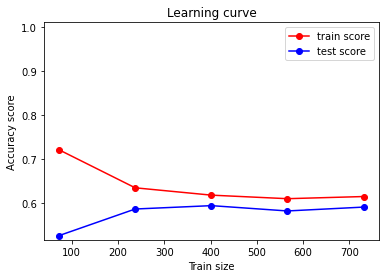

In [2079]:
#Evaluate the model and plot learning curve
model = LogisticRegression(C=0.1,multi_class='multinomial',max_iter=3000)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['Logistic regression',('A','Weighting','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### SVM modeling

In [2199]:
#Get the best parameters
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = std_split2_data(X,y)
model = SVC()
parameters = {'class_weight':[weight],'C':[0.01,0.1,1,10,100]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

#Record the best parameter and score
acc.loc['SVM',('A','Weighting','Parameter')] = str(model_bp.best_params_)
acc.loc['SVM',('A','Weighting','Best score')] = model_bp.best_score_

The best parameter is {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7: 143, 4: 33, 8: 16, 3: 6}} and the best score is 0.598530989044664


Model test accuracy: 0.62882096069869


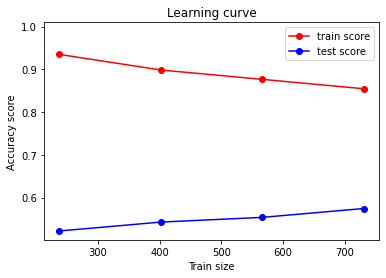

In [2200]:
#Evaluate the model and plot learning curve
model = SVC(C=0.1,class_weight=weight)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['SVM',('A','Weighting','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Tree modeling

In [2082]:
#Get the best parameters
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = std_split2_data(X,y)
model = DecisionTreeClassifier()
parameters = {'class_weight':[weight],'max_depth':[4,5,6,7,8,9,10,11,12,13,14]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

#Record the best parameter and score
acc.loc['Tree',('A','Weighting','Parameter')] = str(model_bp.best_params_)
acc.loc['Tree',('A','Weighting','Best score')] = model_bp.best_score_


The best parameter is {'class_weight': {5: 483, 6: 462, 7: 143, 4: 33, 8: 16, 3: 6}, 'max_depth': 5} and the best score is 0.5514058070941545


Model test accuracy: 0.5895196506550219


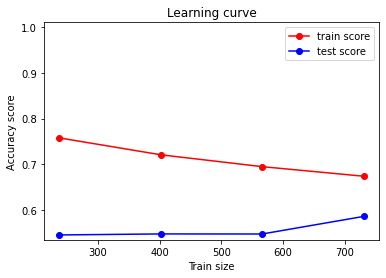

In [2201]:
#Evaluate the model and plot learning curve
model = DecisionTreeClassifier(max_depth=5,class_weight=weight)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['Tree',('A','Weighting','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Accuracy table

In [2084]:
#Obtain a table of accuracies of each model
acc.loc(axis=1)[:,:,'Test score']

A                      
                       Preliminary Polynomial  Weighting
                        Test score Test score Test score
Model                                                   
K neighbors classifier    0.611354   0.616279   0.681223
Logistic regression       0.593886   0.633721   0.593886
Neural network            0.624454   0.552326        NaN
SVM                       0.663755   0.645349   0.633188
Tree                      0.567686   0.558140   0.563319

### 6. Modeling with polynomial featured data and weighting
Objectives
- To train the underfit models in addition of polynomial features and weighting
- To apply and obtain the best parameter and polynomial index of each model

Conclusions
- These test accuracy scores fall between test accuracy scores of that with polynomial feature (section 3) and that with weighting (section 4) in general implying that there is no improvement in test accuracy

In [2085]:
cols = pd.MultiIndex.from_product([['A'],['Weighting and polynomial'],['Polynomial index','Parameter','Train score','Validation score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                                                       \
                                             Weighting and polynomial   
                       Best score Test score         Polynomial index   
Model                                                                   
K neighbors classifier   0.620389   0.681223                      NaN   
Logistic regression      0.584238   0.593886                      NaN   
Neural network                NaN        NaN                      NaN   
SVM                      0.598531   0.633188                      NaN   
Tree                     0.551406   0.563319                      NaN   

                                                                          
                                                                          
 

#### K neighbors classifier modeling

In [2086]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [5,6,7,8,9,10,11]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = KNeighborsClassifier(p,weights='distance')
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 5 combination run is completed
2 6 combination run is completed
2 7 combination run is completed
2 8 combination run is completed
2 9 combination run is completed
2 10 combination run is completed
2 11 combination run is completed
3 5 combination run is completed
3 6 combination run is completed
3 7 combination run is completed
3 8 combination run is completed
3 9 combination run is completed
3 10 combination run is completed
3 11 combination run is completed
4 5 combination run is completed
4 6 combination run is completed
4 7 combination run is completed
4 8 combination run is completed
4 9 combination run is completed
4 10 combination run is completed
4 11 combination run is completed


In [2087]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['K neighbors classifier',('A','Weighting and polynomial','Parameter')] = str({'class_weight':'weight','n_neighbors':bp['Hyperparameter'][0]})
acc.loc['K neighbors classifier',('A','Weighting and polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['K neighbors classifier',('A','Weighting and polynomial','Train score')] = bp['Train score'][0]
acc.loc['K neighbors classifier',('A','Weighting and polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['K neighbors classifier',('A','Weighting and polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
5,2,10,1.0,0.660819,0.651163
6,2,11,1.0,0.637427,0.651163
12,3,10,1.0,0.637427,0.622093


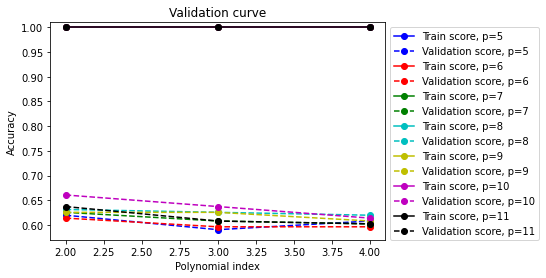

In [2088]:
#Plot validation curve
plot_validation_curve(score,P)

#### Logistic regression modeling

In [2089]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [0.1,1,10,100]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = LogisticRegression(C=p, class_weight=weight, solver="lbfgs", multi_class='multinomial', max_iter=10000)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 0.1 combination run is completed
2 1 combination run is completed
2 10 combination run is completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2 100 combination run is completed
3 0.1 combination run is completed
3 1 combination run is completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3 10 combination run is completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3 100 combination run is completed
4 0.1 combination run is completed
4 1 combination run is completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4 10 combination run is completed
4 100 combination run is completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2090]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Logistic regression',('A','Weighting and polynomial','Parameter')] = str({'class_weight':'weight','C':bp['Hyperparameter'][0],'solver':'lbfgs', 'multi_class':'multinomial', 'max_iter':10000})
acc.loc['Logistic regression',('A','Weighting and polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Logistic regression',('A','Weighting and polynomial','Train score')] = bp['Train score'][0]
acc.loc['Logistic regression',('A','Weighting and polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Logistic regression',('A','Weighting and polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
10,4,10.0,0.98750,0.625731,0.558140
11,4,100.0,0.99625,0.614035,0.552326
9,4,1.0,0.91750,0.602339,0.581395


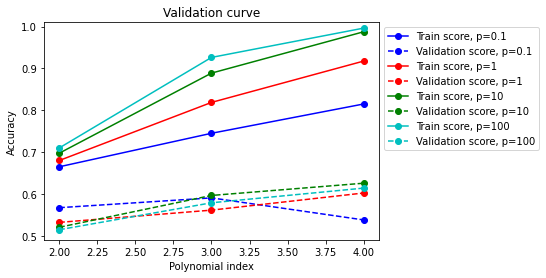

In [2091]:
#Plot validation curve
plot_validation_curve(score,P)

#### SVM modeling

In [2092]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [1,3,10,30,100,300]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = SVC(C=p, class_weight=weight, kernel="rbf", gamma='auto')
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 1 combination run is completed
2 3 combination run is completed
2 10 combination run is completed
2 30 combination run is completed
2 100 combination run is completed
2 300 combination run is completed
3 1 combination run is completed
3 3 combination run is completed
3 10 combination run is completed
3 30 combination run is completed
3 100 combination run is completed
3 300 combination run is completed
4 1 combination run is completed
4 3 combination run is completed
4 10 combination run is completed
4 30 combination run is completed
4 100 combination run is completed
4 300 combination run is completed


In [2093]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['SVM',('A','Weighting and polynomial','Parameter')] = str({'class_weight':'weight','C':bp['Hyperparameter'][0],'kernel':'rbf','gamma':'auto'})
acc.loc['SVM',('A','Weighting and polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['SVM',('A','Weighting and polynomial','Train score')] = bp['Train score'][0]
acc.loc['SVM',('A','Weighting and polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['SVM',('A','Weighting and polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
17,4,300,1.0000,0.631579,0.604651
16,4,100,0.9975,0.631579,0.598837
13,4,3,0.9425,0.631579,0.633721


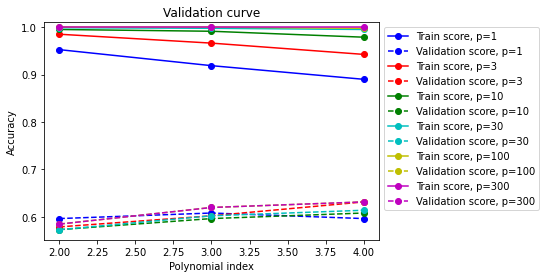

In [2094]:
#Plot validation curve
plot_validation_curve(score,P)

#### Tree modeling

In [2095]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [5,6,7,8]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = DecisionTreeClassifier(max_depth=p, class_weight=weight)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 5 combination run is completed
2 6 combination run is completed
2 7 combination run is completed
2 8 combination run is completed
3 5 combination run is completed
3 6 combination run is completed
3 7 combination run is completed
3 8 combination run is completed
4 5 combination run is completed
4 6 combination run is completed
4 7 combination run is completed
4 8 combination run is completed


In [2096]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Tree',('A','Weighting and polynomial','Parameter')] = str({'class_weight':'weight','max_depth':bp['Hyperparameter'][0]})
acc.loc['Tree',('A','Weighting and polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Tree',('A','Weighting and polynomial','Train score')] = bp['Train score'][0]
acc.loc['Tree',('A','Weighting and polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Tree',('A','Weighting and polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
0,2,5,0.68375,0.602339,0.529070
2,2,7,0.79000,0.590643,0.534884
4,3,5,0.71375,0.578947,0.552326


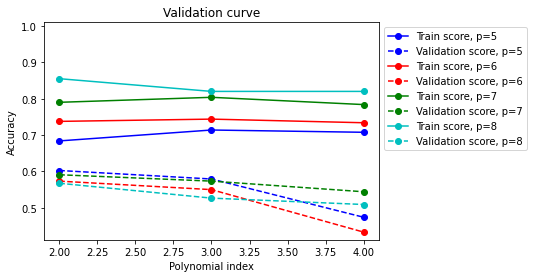

In [2097]:
#Plot validation curve
plot_validation_curve(score,P)

#### Accuracy table

In [2098]:
acc.loc(axis=1)[:,:,'Test score']

A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.624454   0.552326        NaN   
SVM                       0.663755   0.645349   0.633188   
Tree                      0.567686   0.558140   0.563319   

                                                 
                       Weighting and polynomial  
                                     Test score  
Model                                            
K neighbors classifier                 0.639535  
Logistic regression                    0.610465  
Neural network                              NaN  
SVM                                    0.662791  
Tree                                   0.529070

## B. Dataset log(X), y

### 7. Data wrangling with log
Objectives
- To reduce the skewness of the data in order to improve the test accuracy of the models

In [2099]:
#Create less skewed log(X) data
y = data['quality']
X = data.drop(['quality','Id'], axis = 1)
X_add = X
X_add['citric acid'] = X_add['citric acid'] + 1e-4
X_log = np.log(X)
X_log.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,-0.356675,-9.210340,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710
1,2.054124,-0.127833,-9.210340,0.955511,-2.322788,3.218876,4.204693,-0.003205,1.163151,-0.385662,2.282382
2,2.054124,-0.274437,-3.216379,0.832909,-2.385967,2.708050,3.988984,-0.003005,1.181727,-0.430783,2.282382
3,2.415914,-1.272966,-0.579640,0.641854,-2.590267,2.833213,4.094345,-0.002002,1.150572,-0.544727,2.282382
4,2.001480,-0.356675,-9.210340,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710


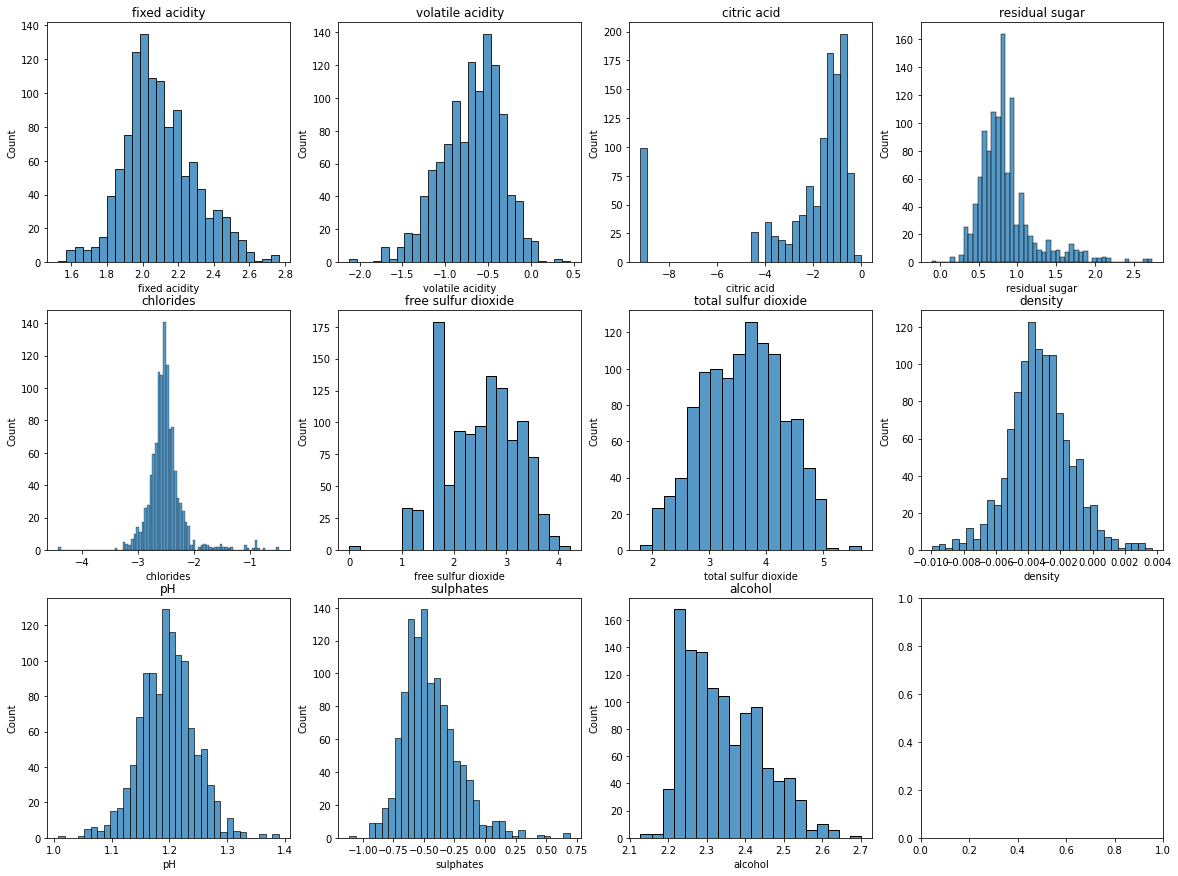

In [2100]:
fig_log, axes = plt.subplots(3,4,figsize=(20,15))
l = 0
for n in [0,1,2]:
    for m in [0,1,2,3]:
        try:
            sns.histplot(X_log[X_log.columns.tolist()[l]], ax=axes[n,m], label=str(X_log.columns.tolist()[l]))
            axes[n,m].title.set_text(str(X_log.columns.tolist()[l]))
        except:
            pass
        l+=1

In [2101]:
X_train, X_test, y_train, y_test = std_split2_data(X_log,y)

### 8. Preliminary modeling with log(X)
Objectives
- To fit several models with log(X)
- To evaluate the models with log(X)

Conclusions
- Models improves very slightly in test accuracy in general compared to using data X (section A)
- SVM: highest in test accuracy with log(X)

In [2102]:
cols = pd.MultiIndex.from_product([['B'],['Preliminary'],['Parameter','Best score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                                                       \
                                             Weighting and polynomial   
                       Best score Test score         Polynomial index   
Model                                                                   
K neighbors classifier   0.620389   0.681223                      2.0   
Logistic regression      0.584238   0.593886                      2.0   
Neural network                NaN        NaN                      NaN   
SVM                      0.598531   0.633188                      2.0   
Tree                     0.551406   0.563319                      2.0   

                                                                           \
                                                                          

#### K neighbors classifier

In [2103]:
#Get the best parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = std_split2_data(X_log,y)
model = KNeighborsClassifier()
parameters = {'n_neighbors':[5,6,7,8,9,10,11,12]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['K neighbors classifier',('B','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['K neighbors classifier',('B','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'n_neighbors': 10} and the best score is 0.5798810618248679


Model test accuracy: 0.6375545851528385


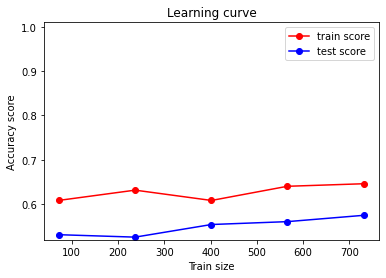

In [2104]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['K neighbors classifier',('B','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Logistic regression

In [2105]:
#Get the best parameters
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = std_split2_data(X_log,y)
model = LogisticRegression()
parameters = {'C':[0.1,1,10],'multi_class':['multinomial'],'max_iter':[400]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['Logistic regression',('B','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['Logistic regression',('B','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'C': 10, 'max_iter': 400, 'multi_class': 'multinomial'} and the best score is 0.6006617252738834


Model test accuracy: 0.5633187772925764


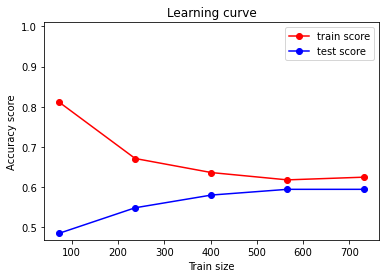

In [2106]:
model = LogisticRegression(C=10,multi_class='multinomial',max_iter=400)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['Logistic regression',('B','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Neural network modeling

In [2107]:
#Get the best parameters
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = std_split2_data(X_log,y)
model = MLPClassifier()
parameters = {'alpha':[0.01,0.1,1,10,100],'hidden_layer_sizes':[8,13,18,23],'activation':['logistic'],'solver':['lbfgs'],'max_iter':[5000]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['Neural network',('B','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['Neural network',('B','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_, model_bp.best_score_))

The best parameter is {'activation': 'logistic', 'alpha': 1, 'hidden_layer_sizes': 23, 'max_iter': 5000, 'solver': 'lbfgs'} and the best score is 0.6126752470696392


Model test accuracy: 0.6085364135793772


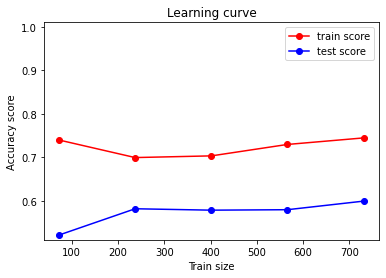

In [2202]:
model = MLPClassifier(alpha=1, hidden_layer_sizes=23, activation='logistic', solver='lbfgs', max_iter=5000)
model.fit(X_train,y_train)
i = 0
score_NN = 0
while i < 30:
    predicted_y = model.predict(X_test)
    score_NN = score_NN + accuracy_score(y_test, predicted_y)
    i += 1
score_NN = score_NN / (i+1)
acc.loc['Neural network',('B','Preliminary','Test score')] = score_NN
print('Model test accuracy:', score_NN)
plot_learning_curve(model,X_train,y_train)

#### SVM modeling

In [2109]:
#Get the best parameters
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = std_split2_data(X_log,y)
model = SVC()
parameters = {'C':[0.01,0.1,1,10,100], 'kernel':['sigmoid','rbf','linear']}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['SVM',('B','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['SVM',('B','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'C': 1, 'kernel': 'rbf'} and the best score is 0.5984639546464414


Model test accuracy: 0.6550218340611353


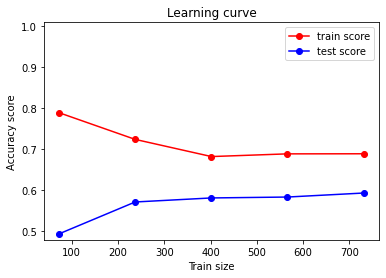

In [2110]:
model = SVC(C=1)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['SVM',('B','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Accuracy table

In [2111]:
#Obtain a table of accuracies of each model
acc.loc(axis=1)[:,:,'Test score']


A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.624454   0.552326        NaN   
SVM                       0.663755   0.645349   0.633188   
Tree                      0.567686   0.558140   0.563319   

                                                          B  
                       Weighting and polynomial Preliminary  
                                     Test score  Test score  
Model                                                        
K neighbors classifier                 0.639535    0.637555  
Logistic regression                    0.610465    0.563319  
Neural network                              NaN    0.528243  
SVM                                    0.662791    0.655022  
Tree                                   0.529070         NaN

### 9. Modeling with polynomial featured data and log(X)
Objectives
- To train the underfit models (Logistic regression and neural network) with polynomial featured data in addition of polynomial features
- To apply and obtain the best parameter and polynomial index of each model

Conclusions
- Models improve significantly in test accuracy

In [2112]:
cols = pd.MultiIndex.from_product([['B'],['Polynomial'],['Polynomial index','Parameter','Train score','Validation score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                   ...                                      \
                                   ... Weighting and polynomial              
                       Best score  ...         Validation score Test score   
Model                              ...                                       
K neighbors classifier   0.620389  ...                 0.619883   0.639535   
Logistic regression      0.584238  ...                 0.567251   0.610465   
Neural network                NaN  ...                      NaN        NaN   
SVM                      0.598531  ...                 0.596491   0.662791   
Tree                     0.551406  ...                 0.602339   0.529070   

                                                                        B  \
                             

#### Logistic regression modeling

In [2113]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [0.1,1,10,100]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X_log)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = LogisticRegression(C=p, solver="lbfgs", multi_class='multinomial', max_iter=10000)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 0.1 combination run is completed
2 1 combination run is completed
2 10 combination run is completed
2 100 combination run is completed
3 0.1 combination run is completed
3 1 combination run is completed
3 10 combination run is completed
3 100 combination run is completed
4 0.1 combination run is completed
4 1 combination run is completed
4 10 combination run is completed
4 100 combination run is completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2114]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Logistic regression',('B','Polynomial','Parameter')] = str({'C':bp['Hyperparameter'][0],'solver':'lbfgs','multi_class':'multinomial','max_iter':10000})
acc.loc['Logistic regression',('B','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Logistic regression',('B','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['Logistic regression',('B','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Logistic regression',('B','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
4,3,0.1,0.66250,0.590643,0.645349
0,2,0.1,0.61875,0.584795,0.622093
5,3,1.0,0.71625,0.584795,0.604651


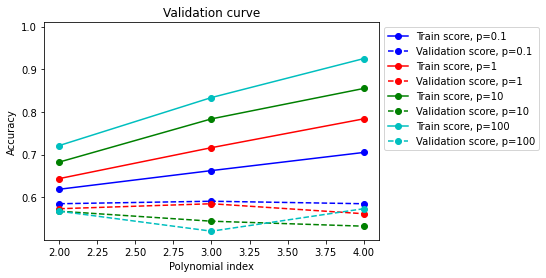

In [2115]:
#Plot validation curve
plot_validation_curve(score,P)

#### Neural network modeling

In [2116]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [8,13,18,23]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X_log)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = MLPClassifier(solver='lbfgs',activation='logistic', hidden_layer_sizes=(p,), max_iter=3000)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        i = 0
        NN_train = []
        NN_cv = []
        NN_test = []
        while i < 30:
            predicted_y = model.predict(X_train)
            NN_train.append(accuracy_score(y_train, predicted_y))
            predicted_y = model.predict(X_cv)
            NN_cv.append(accuracy_score(y_cv, predicted_y))
            predicted_y = model.predict(X_test)
            NN_test.append(accuracy_score(y_test, predicted_y))
            i += 1
        train_score.append(sum(NN_train)/len(NN_train))
        validation_score.append(sum(NN_cv)/len(NN_cv))
        test_score.append(sum(NN_test)/len(NN_test))
        print(n,p, 'combination run is completed')

2 8 combination run is completed
2 13 combination run is completed
2 18 combination run is completed
2 23 combination run is completed
3 8 combination run is completed
3 13 combination run is completed
3 18 combination run is completed
3 23 combination run is completed
4 8 combination run is completed
4 13 combination run is completed
4 18 combination run is completed
4 23 combination run is completed


In [2117]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Neural network',('B','Polynomial','Parameter')] = str({'hidden_layer_sizes':bp['Hyperparameter'][0],'solver':'lbfgs','activation':'logistic','max_iter':3000})
acc.loc['Neural network',('B','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Neural network',('B','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['Neural network',('B','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Neural network',('B','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
3,2,23,0.98500,0.637427,0.534884
9,4,13,0.83875,0.619883,0.563953
11,4,23,0.96875,0.608187,0.627907


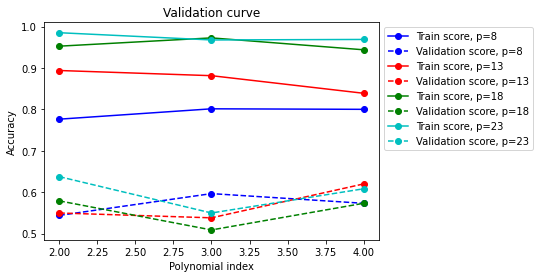

In [2118]:
#Plot validation curve
plot_validation_curve(score,P)

#### Accuracy table

In [2119]:
acc.loc(axis=1)[:,:,'Test score']

A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.624454   0.552326        NaN   
SVM                       0.663755   0.645349   0.633188   
Tree                      0.567686   0.558140   0.563319   

                                                          B             
                       Weighting and polynomial Preliminary Polynomial  
                                     Test score  Test score Test score  
Model                                                                   
K neighbors classifier                 0.639535    0.637555        NaN  
Logistic regression                    0.610465    0.563319   0.622093  
Neural network                              NaN    0.528243   0.540698  
SVM                                    0.662791    0.655022        NaN  
Tree                                   0.529070         NaN        NaN

### 10. Further modeling with weighting and log(X)
- To fit K neighbors classifier with weighting and log(X)
- To evaluate the K neighbors classifier with weighting and log(X)

Conclusions
- K neighbors classifier improves significantly in test accuracy

In [2120]:
cols = pd.MultiIndex.from_product([['B'],['Weighting'],['Parameter','Best score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                   ...           B             \
                                   ... Preliminary              
                       Best score  ...  Best score Test score   
Model                              ...                          
K neighbors classifier   0.620389  ...    0.579881   0.637555   
Logistic regression      0.584238  ...    0.600662   0.563319   
Neural network                NaN  ...    0.612675   0.528243   
SVM                      0.598531  ...    0.598464   0.655022   
Tree                     0.551406  ...         NaN        NaN   

                                         \
                             Polynomial   
                       Polynomial index   
Model                                     
K neighbors classifier              NaN   
Logistic

#### K neighbors classifier

In [2197]:
#Get the best parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = std_split2_data(X_log,y)
model = KNeighborsClassifier()
parameters = {'weights':['distance'],'n_neighbors':[5,6,7,8,9,10,11,12]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

#Record the best parameter and score
acc.loc['K neighbors classifier',('B','Weighting','Parameter')] = str(model_bp.best_params_)
acc.loc['K neighbors classifier',('B','Weighting','Best score')] = model_bp.best_score_

The best parameter is {'n_neighbors': 11, 'weights': 'distance'} and the best score is 0.6280404887765265


Model test accuracy: 0.6855895196506551


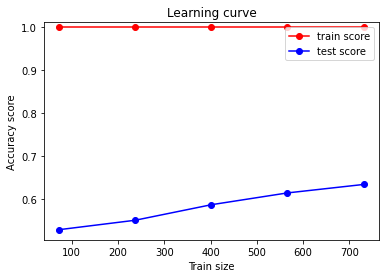

In [2193]:
#Evaluate the model and plot learning curve
model = KNeighborsClassifier(n_neighbors = 11, weights='distance')
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['K neighbors classifier',('B','Weighting','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Accuracy table

In [2123]:
#Obtain a table of accuracies of each model
acc.loc(axis=1)[:,:,'Test score']


A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.624454   0.552326        NaN   
SVM                       0.663755   0.645349   0.633188   
Tree                      0.567686   0.558140   0.563319   

                                                          B             \
                       Weighting and polynomial Preliminary Polynomial   
                                     Test score  Test score Test score   
Model                                                                    
K neighbors classifier                 0.639535    0.637555        NaN   
Logistic regression                    0.610465    0.563319   0.622093   
Neural network                              NaN    0.528243   0.540698   
SVM                                    0.662791    0.655022        NaN   
Tree                                   0.529070         NaN        NaN   

                                   
                        Weighting  
                       Test score  
Model                              
K neighbors classifier   0.733624  
Logistic regression           NaN  
Neural network                NaN  
SVM                           NaN  
Tree                          NaN

## C. Feature selection (8)

### 11. Feature selection


In [2124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2125]:
SelectKBest(chi2).fit(X,y).scores_

array([7.81329940e+00, 1.20748440e+01, 1.18872312e+01, 4.47774962e+00,
       4.68700129e-01, 8.99288645e+01, 1.68202409e+03, 1.53762721e-04,
       1.51708914e-01, 3.70731314e+00, 3.41723003e+01])

In [2126]:
#Select the feature with chi square score in the order e0 or above
idx8 = SelectKBest(chi2,k=8).fit(X,y).get_support(indices=True)
new_col = X.columns[idx8]
X_fs8 = SelectKBest(chi2,k=8).fit_transform(X,y)
X_train, X_test, y_train, y_test = std_split2_data(X_fs8,y)

### 12. Preliminary modeling with selected features
Objectives
- To fit several models with selected features
- To evaluate the models with selected features

Conclusions
- SVM: highest in test accuracy

In [2127]:
cols = pd.MultiIndex.from_product([['C'],['Preliminary'],['Parameter','Best score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                   ...  \
                                   ...   
                       Best score  ...   
Model                              ...   
K neighbors classifier   0.620389  ...   
Logistic regression      0.584238  ...   
Neural network                NaN  ...   
SVM                      0.598531  ...   
Tree                     0.551406  ...   

                                                                        B  \
                                                               Polynomial   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                                NaN   
Logistic regression     {'C': 0.1, 'solver': 

#### K neighbors classifier

In [2128]:
#Get the best parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = std_split2_data(X_fs8,y)
model = KNeighborsClassifier()
parameters = {'n_neighbors':[5,6,7,8,9,10,11,12]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['K neighbors classifier',('C','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['K neighbors classifier',('C','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'n_neighbors': 12} and the best score is 0.5787749942541944


Model test accuracy: 0.5633187772925764


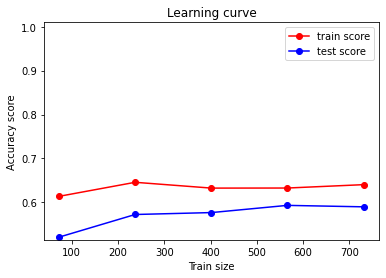

In [2129]:
model = KNeighborsClassifier(n_neighbors = 12)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['K neighbors classifier',('C','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Logistic regression

In [2130]:
#Get the best parameters
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = std_split2_data(X_fs8,y)
model = LogisticRegression()
parameters = {'C':[0.1,1,10],'multi_class':['multinomial'],'max_iter':[400]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['Logistic regression',('C','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['Logistic regression',('C','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'C': 10, 'max_iter': 400, 'multi_class': 'multinomial'} and the best score is 0.6006569371025818


Model test accuracy: 0.5938864628820961


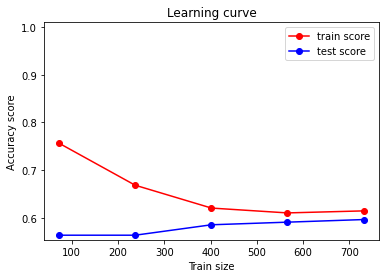

In [2131]:
model = LogisticRegression(C=10,multi_class='multinomial',max_iter=400)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['Logistic regression',('C','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Neural network modeling

In [2132]:
#Get the best parameters
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = std_split2_data(X_fs8,y)
model = MLPClassifier()
parameters = {'alpha':[0.01,0.1,1,10,100],'hidden_layer_sizes':[8,13,18,23],'activation':['logistic'],'solver':['lbfgs'],'max_iter':[5000]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['Neural network',('C','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['Neural network',('C','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_, model_bp.best_score_))

The best parameter is {'activation': 'logistic', 'alpha': 1, 'hidden_layer_sizes': 8, 'max_iter': 5000, 'solver': 'lbfgs'} and the best score is 0.6061202405577262


Model test accuracy: 0.638118044795042


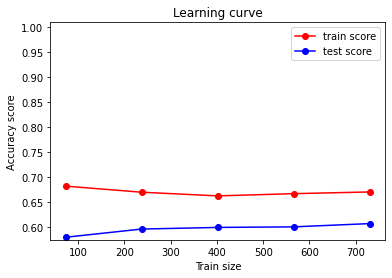

In [2133]:
model = MLPClassifier(alpha=1, hidden_layer_sizes=13, activation='logistic', solver='lbfgs', max_iter=5000)
model.fit(X_train,y_train)
i = 0
score_NN = 0
while i < 30:
    predicted_y = model.predict(X_test)
    score_NN = score_NN + accuracy_score(y_test, predicted_y)
    i += 1
score_NN = score_NN / (i+1)
acc.loc['Neural network',('C','Preliminary','Test score')] = score_NN
print('Model test accuracy:', score_NN)
plot_learning_curve(model,X_train,y_train)

#### SVM modeling

In [2134]:
#Get the best parameters
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = std_split2_data(X_fs8,y)
model = SVC()
parameters = {'C':[0.01,0.1,1,10,100], 'kernel':['sigmoid','rbf','linear']}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['SVM',('C','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['SVM',('C','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'C': 1, 'kernel': 'rbf'} and the best score is 0.611602696698077


Model test accuracy: 0.6724890829694323


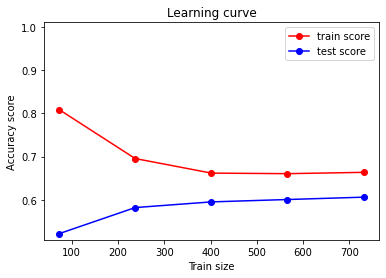

In [2135]:
model = SVC(C=1)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['SVM',('C','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Accuracy table

In [2136]:
#Obtain a table of accuracies of each model
acc.loc(axis=1)[:,:,'Test score']


A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.624454   0.552326        NaN   
SVM                       0.663755   0.645349   0.633188   
Tree                      0.567686   0.558140   0.563319   

                                                          B             \
                       Weighting and polynomial Preliminary Polynomial   
                                     Test score  Test score Test score   
Model                                                                    
K neighbors classifier                 0.639535    0.637555        NaN   
Logistic regression                    0.610465    0.563319   0.622093   
Neural network                              NaN    0.528243   0.540698   
SVM                                    0.662791    0.655022        NaN   
Tree                                   0.529070         NaN        NaN   

                                            C  
                        Weighting Preliminary  
                       Test score  Test score  
Model                                          
K neighbors classifier   0.733624    0.563319  
Logistic regression           NaN    0.593886  
Neural network                NaN    0.638118  
SVM                           NaN    0.672489  
Tree                          NaN         NaN

### 13. Modeling with polynomial selected featured data
Objectives
- To train the underfit models (logistic regression and neural network) in addition of polynomial features
- To apply and obtain the best parameter and polynomial index of each model

Conclusions
- Models improve significantly in test accuracy

In [2137]:
cols = pd.MultiIndex.from_product([['C'],['Polynomial'],['Polynomial index','Parameter','Train score','Validation score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                   ...          B             \
                                   ...  Weighting              
                       Best score  ... Best score Test score   
Model                              ...                         
K neighbors classifier   0.620389  ...    0.62804   0.733624   
Logistic regression      0.584238  ...        NaN        NaN   
Neural network                NaN  ...        NaN        NaN   
SVM                      0.598531  ...        NaN        NaN   
Tree                     0.551406  ...        NaN        NaN   

                                                                        C  \
                                                              Preliminary   
                                                                Parameter   
M

#### Logistic regression modeling

In [2138]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [0.1,1,10,100]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X_fs8)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = LogisticRegression(C=p, solver="lbfgs", multi_class='multinomial', max_iter=10000)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 0.1 combination run is completed
2 1 combination run is completed
2 10 combination run is completed
2 100 combination run is completed
3 0.1 combination run is completed
3 1 combination run is completed
3 10 combination run is completed
3 100 combination run is completed
4 0.1 combination run is completed
4 1 combination run is completed
4 10 combination run is completed
4 100 combination run is completed


In [2139]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Logistic regression',('C','Polynomial','Parameter')] = str({'C':bp['Hyperparameter'][0],'solver':'lbfgs','multi_class':'multinomial','max_iter':10000})
acc.loc['Logistic regression',('C','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Logistic regression',('C','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['Logistic regression',('C','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Logistic regression',('C','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
8,4,0.1,0.66375,0.602339,0.633721
1,2,1.0,0.64125,0.584795,0.656977
5,3,1.0,0.66125,0.584795,0.633721


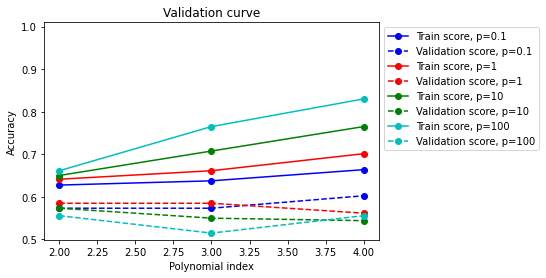

In [2140]:
#Plot validation curve
plot_validation_curve(score,P)

#### Neural network modeling

In [2141]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [8,13,18,23]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X_fs8)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = MLPClassifier(solver='lbfgs',activation='logistic', hidden_layer_sizes=(p,), max_iter=3000)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        i = 0
        NN_train = []
        NN_cv = []
        NN_test = []
        while i < 30:
            predicted_y = model.predict(X_train)
            NN_train.append(accuracy_score(y_train, predicted_y))
            predicted_y = model.predict(X_cv)
            NN_cv.append(accuracy_score(y_cv, predicted_y))
            predicted_y = model.predict(X_test)
            NN_test.append(accuracy_score(y_test, predicted_y))
            i += 1
        train_score.append(sum(NN_train)/len(NN_train))
        validation_score.append(sum(NN_cv)/len(NN_cv))
        test_score.append(sum(NN_test)/len(NN_test))
        print(n,p, 'combination run is completed')

2 8 combination run is completed
2 13 combination run is completed
2 18 combination run is completed
2 23 combination run is completed
3 8 combination run is completed
3 13 combination run is completed
3 18 combination run is completed
3 23 combination run is completed
4 8 combination run is completed
4 13 combination run is completed
4 18 combination run is completed
4 23 combination run is completed


In [2142]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Neural network',('C','Polynomial','Parameter')] = str({'hidden_layer_sizes':bp['Hyperparameter'][0],'solver':'lbfgs','activation':'logistic','max_iter':3000})
acc.loc['Neural network',('C','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Neural network',('C','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['Neural network',('C','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Neural network',('C','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
0,2,8,0.78000,0.584795,0.604651
6,3,18,0.96500,0.584795,0.563953
3,2,23,0.99125,0.578947,0.529070


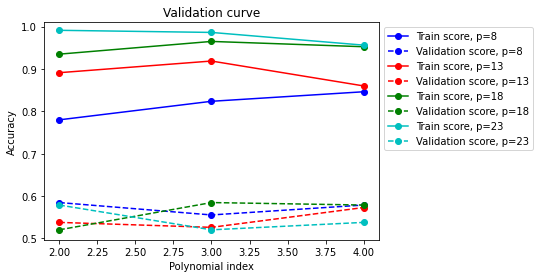

In [2143]:
#Plot validation curve
plot_validation_curve(score,P)

#### Accuracy table

In [2144]:
acc.loc(axis=1)[:,:,'Test score']

A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.624454   0.552326        NaN   
SVM                       0.663755   0.645349   0.633188   
Tree                      0.567686   0.558140   0.563319   

                                                          B             \
                       Weighting and polynomial Preliminary Polynomial   
                                     Test score  Test score Test score   
Model                                                                    
K neighbors classifier                 0.639535    0.637555        NaN   
Logistic regression                    0.610465    0.563319   0.622093   
Neural network                              NaN    0.528243   0.540698   
SVM                                    0.662791    0.655022        NaN   
Tree                                   0.529070         NaN        NaN   

                                            C             
                        Weighting Preliminary Polynomial  
                       Test score  Test score Test score  
Model                                                     
K neighbors classifier   0.733624    0.563319        NaN  
Logistic regression           NaN    0.593886   0.656977  
Neural network                NaN    0.638118   0.604651  
SVM                           NaN    0.672489        NaN  
Tree                          NaN         NaN        NaN

### 14. Further modeling with weighting and selected features
- To fit K neighbors classifier with weighting and selected features
- To evaluate K neighbors classifier with weighting and selected features

Conclusions
- K neighbors classifier improves significantly

In [2145]:
cols = pd.MultiIndex.from_product([['C'],['Weighting'],['Parameter','Best score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                   ...           C             \
                                   ... Preliminary              
                       Best score  ...  Best score Test score   
Model                              ...                          
K neighbors classifier   0.620389  ...    0.578775   0.563319   
Logistic regression      0.584238  ...    0.600657   0.593886   
Neural network                NaN  ...    0.606120   0.638118   
SVM                      0.598531  ...    0.611603   0.672489   
Tree                     0.551406  ...         NaN        NaN   

                                         \
                             Polynomial   
                       Polynomial index   
Model                                     
K neighbors classifier              NaN   
Logistic

#### K neighbors classifier

In [2203]:
#Get the best parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = std_split2_data(X_fs8,y)
model = KNeighborsClassifier()
parameters = {'weights':['distance'],'n_neighbors':[5,6,7,8,9,10,11,12]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

#Record the best parameter and score
acc.loc['K neighbors classifier',('C','Weighting','Parameter')] = str(model_bp.best_params_)
acc.loc['K neighbors classifier',('C','Weighting','Best score')] = model_bp.best_score_

The best parameter is {'n_neighbors': 11, 'weights': 'distance'} and the best score is 0.6280213360913199


Model test accuracy: 0.6681222707423581


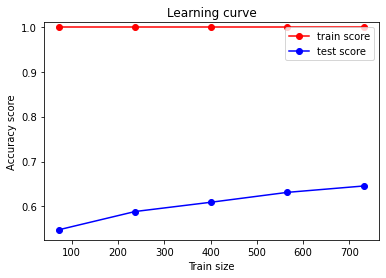

In [2204]:
#Evaluate the model and plot learning curve
model = KNeighborsClassifier(n_neighbors = 11, weights='distance')
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['K neighbors classifier',('C','Weighting','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Accuracy table

In [2148]:
#Obtain a table of accuracies of each model
acc.loc(axis=1)[:,:,'Test score']


A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.624454   0.552326        NaN   
SVM                       0.663755   0.645349   0.633188   
Tree                      0.567686   0.558140   0.563319   

                                                          B             \
                       Weighting and polynomial Preliminary Polynomial   
                                     Test score  Test score Test score   
Model                                                                    
K neighbors classifier                 0.639535    0.637555        NaN   
Logistic regression                    0.610465    0.563319   0.622093   
Neural network                              NaN    0.528243   0.540698   
SVM                                    0.662791    0.655022        NaN   
Tree                                   0.529070         NaN        NaN   

                                            C                        
                        Weighting Preliminary Polynomial  Weighting  
                       Test score  Test score Test score Test score  
Model                                                                
K neighbors classifier   0.733624    0.563319        NaN   0.646288  
Logistic regression           NaN    0.593886   0.656977        NaN  
Neural network                NaN    0.638118   0.604651        NaN  
SVM                           NaN    0.672489        NaN        NaN  
Tree                          NaN         NaN        NaN        NaN

## D. Feature selection (5)

### 15. Feature selection


In [2149]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2150]:
SelectKBest(chi2).fit(X,y).scores_

array([7.81329940e+00, 1.20748440e+01, 1.18872312e+01, 4.47774962e+00,
       4.68700129e-01, 8.99288645e+01, 1.68202409e+03, 1.53762721e-04,
       1.51708914e-01, 3.70731314e+00, 3.41723003e+01])

In [2151]:
#Select the feature with chi square score in the order e1 or above
idx5 = SelectKBest(chi2,k=5).fit(X,y).get_support(indices=True)
new_col = X.columns[idx5]
X_fs5 = SelectKBest(chi2,k=5).fit_transform(X,y)
X_train, X_test, y_train, y_test = std_split2_data(X_fs5,y)

### 16. Preliminary modeling with selected features
Objectives
- To fit several models with selected features
- To evaluate the models with selected features

Conclusions
- SVM: highest in test accuracy


In [2152]:
cols = pd.MultiIndex.from_product([['D'],['Preliminary'],['Parameter','Best score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                   ...  \
                                   ...   
                       Best score  ...   
Model                              ...   
K neighbors classifier   0.620389  ...   
Logistic regression      0.584238  ...   
Neural network                NaN  ...   
SVM                      0.598531  ...   
Tree                     0.551406  ...   

                                                                        C  \
                                                               Polynomial   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                                NaN   
Logistic regression     {'C': 0.1, 'solver': 

#### K neighbors classifier

In [2153]:
#Get the best parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = std_split2_data(X_fs5,y)
model = KNeighborsClassifier()
parameters = {'n_neighbors':[5,6,7,8,9,10,11,12]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['K neighbors classifier',('D','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['K neighbors classifier',('D','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'n_neighbors': 5} and the best score is 0.5634049643760055


Model test accuracy: 0.5938864628820961


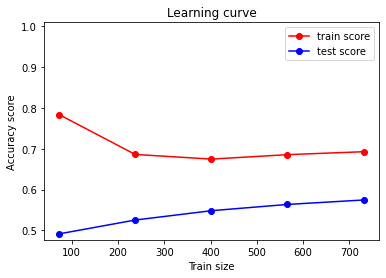

In [2154]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['K neighbors classifier',('D','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Logistic regression

In [2155]:
#Get the best parameters
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = std_split2_data(X_fs5,y)
model = LogisticRegression()
parameters = {'C':[0.1,1,10],'multi_class':['multinomial'],'max_iter':[400]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['Logistic regression',('D','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['Logistic regression',('D','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'C': 0.1, 'max_iter': 400, 'multi_class': 'multinomial'} and the best score is 0.5842526622232437


Model test accuracy: 0.6069868995633187


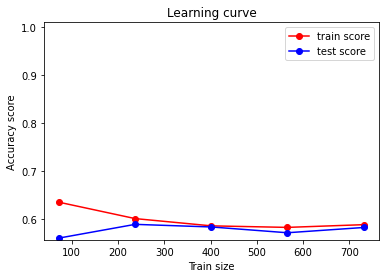

In [2156]:
model = LogisticRegression(C=0.1,multi_class='multinomial',max_iter=400)
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['Logistic regression',('D','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Neural network modeling

In [2157]:
#Get the best parameters
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = std_split2_data(X_fs5,y)
model = MLPClassifier()
parameters = {'alpha':[0.01,0.1,1,10,100],'hidden_layer_sizes':[8,9,10,11,12,13,14],'activation':['logistic'],'solver':['lbfgs'],'max_iter':[5000]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['Neural network',('D','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['Neural network',('D','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_, model_bp.best_score_))

The best parameter is {'activation': 'logistic', 'alpha': 1, 'hidden_layer_sizes': 11, 'max_iter': 5000, 'solver': 'lbfgs'} and the best score is 0.5842622385658469


Model test accuracy: 0.5916326243132836


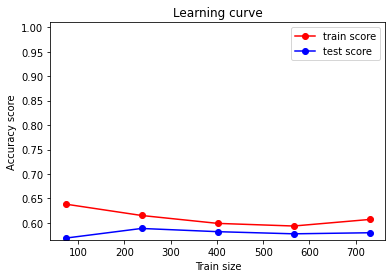

In [2158]:
model = MLPClassifier(alpha=1, hidden_layer_sizes=13, activation='logistic', solver='lbfgs', max_iter=5000)
model.fit(X_train,y_train)
i = 0
score_NN = 0
while i < 30:
    predicted_y = model.predict(X_test)
    score_NN = score_NN + accuracy_score(y_test, predicted_y)
    i += 1
score_NN = score_NN / (i+1)
acc.loc['Neural network',('D','Preliminary','Test score')] = score_NN
print('Model test accuracy:', score_NN)
plot_learning_curve(model,X_train,y_train)

#### SVM modeling

In [2159]:
#Get the best parameters
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = std_split2_data(X_fs5,y)
model = SVC()
parameters = {'C':[0.01,0.1,1,10,100], 'kernel':['sigmoid','rbf','linear']}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
acc.loc['SVM',('D','Preliminary','Parameter')] = str(model_bp.best_params_)
acc.loc['SVM',('D','Preliminary','Best score')] = model_bp.best_score_
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

The best parameter is {'C': 1, 'kernel': 'linear'} and the best score is 0.5908220332490616


Model test accuracy: 0.5938864628820961


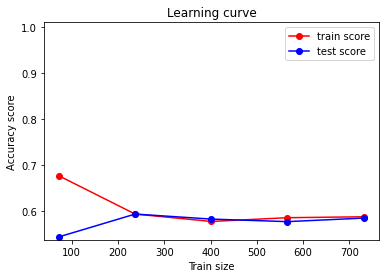

In [2160]:
model = SVC(C=1,kernel='linear')
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['SVM',('D','Preliminary','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Accuracy table

In [2161]:
#Obtain a table of accuracies of each model
acc.loc(axis=1)[:,:,'Test score']


A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.624454   0.552326        NaN   
SVM                       0.663755   0.645349   0.633188   
Tree                      0.567686   0.558140   0.563319   

                                                          B             \
                       Weighting and polynomial Preliminary Polynomial   
                                     Test score  Test score Test score   
Model                                                                    
K neighbors classifier                 0.639535    0.637555        NaN   
Logistic regression                    0.610465    0.563319   0.622093   
Neural network                              NaN    0.528243   0.540698   
SVM                                    0.662791    0.655022        NaN   
Tree                                   0.529070         NaN        NaN   

                                            C                        \
                        Weighting Preliminary Polynomial  Weighting   
                       Test score  Test score Test score Test score   
Model                                                                 
K neighbors classifier   0.733624    0.563319        NaN   0.646288   
Logistic regression           NaN    0.593886   0.656977        NaN   
Neural network                NaN    0.638118   0.604651        NaN   
SVM                           NaN    0.672489        NaN        NaN   
Tree                          NaN         NaN        NaN        NaN   

                                 D  
                       Preliminary  
                        Test score  
Model                               
K neighbors classifier    0.593886  
Logistic regression       0.606987  
Neural network            0.591633  
SVM                       0.593886  
Tree                           NaN

### 17. Modeling with polynomial selected featured data
Objectives
- To train the underfit models (Logistic regression and neural network) in addition of polynomial features
- To apply and obtain the best parameter and polynomial index of each model

Conclusions
- Logistic regression and neural network: improves significantly in test accuracy


In [2162]:
cols = pd.MultiIndex.from_product([['D'],['Polynomial'],['Polynomial index','Parameter','Train score','Validation score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                   ...          C             \
                                   ...  Weighting              
                       Best score  ... Best score Test score   
Model                              ...                         
K neighbors classifier   0.620389  ...   0.628021   0.646288   
Logistic regression      0.584238  ...        NaN        NaN   
Neural network                NaN  ...        NaN        NaN   
SVM                      0.598531  ...        NaN        NaN   
Tree                     0.551406  ...        NaN        NaN   

                                                                        D  \
                                                              Preliminary   
                                                                Parameter   
M

#### Logistic regression modeling

In [2163]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [0.1,1,10,100]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X_fs5)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = LogisticRegression(C=p, solver="lbfgs", multi_class='multinomial', max_iter=10000)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        predicted_y = model.predict(X_train)
        train_score.append(accuracy_score(y_train, predicted_y))
        predicted_y = model.predict(X_cv)
        validation_score.append(accuracy_score(y_cv, predicted_y))
        predicted_y = model.predict(X_test)
        test_score.append(accuracy_score(y_test, predicted_y))
        print(n,p, 'combination run is completed')

2 0.1 combination run is completed
2 1 combination run is completed
2 10 combination run is completed
2 100 combination run is completed
3 0.1 combination run is completed
3 1 combination run is completed
3 10 combination run is completed
3 100 combination run is completed
4 0.1 combination run is completed
4 1 combination run is completed
4 10 combination run is completed
4 100 combination run is completed


In [2164]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Logistic regression',('D','Polynomial','Parameter')] = str({'C':bp['Hyperparameter'][0],'solver':'lbfgs','multi_class':'multinomial','max_iter':10000})
acc.loc['Logistic regression',('D','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Logistic regression',('D','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['Logistic regression',('D','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Logistic regression',('D','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
1,2,1.0,0.61375,0.578947,0.645349
5,3,1.0,0.62125,0.573099,0.651163
2,2,10.0,0.60875,0.567251,0.645349


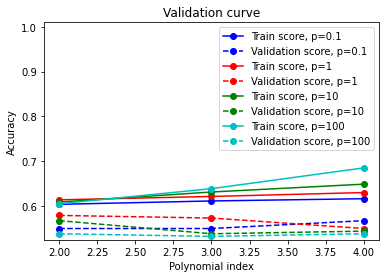

In [2165]:
#Plot validation curve
plot_validation_curve(score,P)

#### Neural network modeling

In [2166]:
#Collect accuracy scores to choose the best hyperparameter and polynomial index
P = [8,13,18,23]
N = [2,3,4]

polynomial_index = []
hyperparameter = []
train_score = []
validation_score = []
test_score = []

for n in N:
    for p in P:
        #Add features
        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X_fs5)
        #Standardize and split data
        X_train, X_cv, X_test, y_train, y_cv, y_test = std_split3_data(X_poly,y)
        #Fit model
        model = MLPClassifier(solver='lbfgs',activation='logistic', hidden_layer_sizes=(p,), max_iter=15000)
        model.fit(X_train,y_train)
        #Evaluate model
        polynomial_index.append(n)
        hyperparameter.append(p)
        i = 0
        NN_train = []
        NN_cv = []
        NN_test = []
        while i < 30:
            predicted_y = model.predict(X_train)
            NN_train.append(accuracy_score(y_train, predicted_y))
            predicted_y = model.predict(X_cv)
            NN_cv.append(accuracy_score(y_cv, predicted_y))
            predicted_y = model.predict(X_test)
            NN_test.append(accuracy_score(y_test, predicted_y))
            i += 1
        train_score.append(sum(NN_train)/len(NN_train))
        validation_score.append(sum(NN_cv)/len(NN_cv))
        test_score.append(sum(NN_test)/len(NN_test))
        print(n,p, 'combination run is completed')

2 8 combination run is completed
2 13 combination run is completed
2 18 combination run is completed
2 23 combination run is completed
3 8 combination run is completed
3 13 combination run is completed
3 18 combination run is completed
3 23 combination run is completed
4 8 combination run is completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


4 13 combination run is completed
4 18 combination run is completed
4 23 combination run is completed


In [2167]:
#Evaluate the model fit with best parameters
score = create_score(polynomial_index,hyperparameter,train_score,validation_score,test_score)
bp = score.sort_values(['Validation score'], ascending=False)

#Record the best parameters and accurary scores
acc.loc['Neural network',('D','Polynomial','Parameter')] = str({'hidden_layer_sizes':bp['Hyperparameter'][0],'solver':'lbfgs','activation':'logistic','max_iter':3000})
acc.loc['Neural network',('D','Polynomial','Polynomial index')] = bp['Polynomial index'][0]
acc.loc['Neural network',('D','Polynomial','Train score')] = bp['Train score'][0]
acc.loc['Neural network',('D','Polynomial','Validation score')] = bp['Validation score'][0]
acc.loc['Neural network',('D','Polynomial','Test score')] = bp['Test score'][0]

bp.head(3)

,Polynomial index,Hyperparameter,Train score,Validation score,Test score
0,2,8,0.69625,0.567251,0.500000
8,4,8,0.75500,0.567251,0.598837
11,4,23,0.99125,0.555556,0.558140


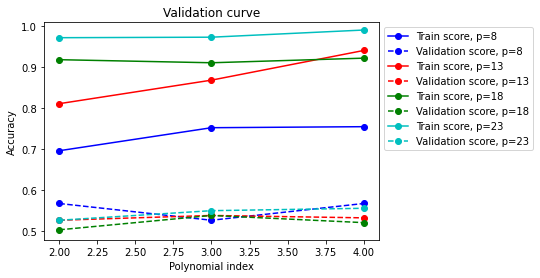

In [2168]:
#Plot validation curve
plot_validation_curve(score,P)

#### Accuracy table

In [2169]:
acc.loc(axis=1)[:,:,'Test score']

A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.624454   0.552326        NaN   
SVM                       0.663755   0.645349   0.633188   
Tree                      0.567686   0.558140   0.563319   

                                                          B             \
                       Weighting and polynomial Preliminary Polynomial   
                                     Test score  Test score Test score   
Model                                                                    
K neighbors classifier                 0.639535    0.637555        NaN   
Logistic regression                    0.610465    0.563319   0.622093   
Neural network                              NaN    0.528243   0.540698   
SVM                                    0.662791    0.655022        NaN   
Tree                                   0.529070         NaN        NaN   

                                            C                        \
                        Weighting Preliminary Polynomial  Weighting   
                       Test score  Test score Test score Test score   
Model                                                                 
K neighbors classifier   0.733624    0.563319        NaN   0.646288   
Logistic regression           NaN    0.593886   0.656977        NaN   
Neural network                NaN    0.638118   0.604651        NaN   
SVM                           NaN    0.672489        NaN        NaN   
Tree                          NaN         NaN        NaN        NaN   

                                 D             
                       Preliminary Polynomial  
                        Test score Test score  
Model                                          
K neighbors classifier    0.593886        NaN  
Logistic regression       0.606987   0.639535  
Neural network            0.591633   0.500000  
SVM                       0.593886        NaN  
Tree                           NaN        NaN

### 18. Further modeling with weighting and selected features
- To fit K neighbors classifier with weighting and selected features
- To evaluate K neighbors classifier with weighting and selected features

Conclusions
- K neighbors classifier improves significantly and highest in test accuracy

In [2170]:
cols = pd.MultiIndex.from_product([['D'],['Weighting'],['Parameter','Best score','Test score']])
acc[cols]=np.nan
acc

A  \
                                                              Preliminary   
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 9}   
Logistic regression     {'C': 1, 'max_iter': 400, 'multi_class': 'mult...   
Neural network          {'activation': 'logistic', 'alpha': 1, 'hidden...   
SVM                                            {'C': 10, 'kernel': 'rbf'}   
Tree                                                     {'max_depth': 3}   

                                                               \
                                                   Polynomial   
                       Best score Test score Polynomial index   
Model                                                           
K neighbors classifier   0.575524   0.611354              2.0   
Logistic regression      0.588605   0.593886              2.0   
Neural network           0.607212   0.624454              2.0   
SVM                      0.613839   0.663755              2.0   
Tree                     0.564549   0.567686              2.0   

                                                                           \
                                                                            
                                                                Parameter   
Model                                                                       
K neighbors classifier                                 {'n_neighbors': 5}   
Logistic regression     {'C': 0.1, 'solver': 'lbfgs', 'multi_class': '...   
Neural network          {'hidden_layer_sizes': 8, 'solver': 'lbfgs', '...   
SVM                            {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
Tree                                                     {'max_depth': 5}   

                                                                \
                                                                 
                       Train score Validation score Test score   
Model                                                            
K neighbors classifier     0.69375         0.549708   0.616279   
Logistic regression        0.63375         0.578947   0.633721   
Neural network             0.78875         0.590643   0.552326   
SVM                        0.66750         0.584795   0.645349   
Tree                       0.71000         0.578947   0.558140   

                                                                           \
                                                                Weighting   
                                                                Parameter   
Model                                                                       
K neighbors classifier         {'n_neighbors': 11, 'weights': 'distance'}   
Logistic regression     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Neural network                                                        NaN   
SVM                     {'C': 0.1, 'class_weight': {5: 483, 6: 462, 7:...   
Tree                    {'class_weight': {5: 483, 6: 462, 7: 143, 4: 3...   

                                   ...           D             \
                                   ... Preliminary              
                       Best score  ...  Best score Test score   
Model                              ...                          
K neighbors classifier   0.620389  ...    0.563405   0.593886   
Logistic regression      0.584238  ...    0.584253   0.606987   
Neural network                NaN  ...    0.584262   0.591633   
SVM                      0.598531  ...    0.590822   0.593886   
Tree                     0.551406  ...         NaN        NaN   

                                         \
                             Polynomial   
                       Polynomial index   
Model                                     
K neighbors classifier              NaN   
Logistic

#### K neighbors classifier

In [2171]:
#Get the best parameters
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = std_split2_data(X_fs5,y)
model = KNeighborsClassifier()
parameters = {'weights':['distance'],'n_neighbors':[5,6,7,8,9,10,11,12]}
model_bp = GridSearchCV(model,parameters,cv=4)
model_bp.fit(X_train,y_train)
print('The best parameter is {0} and the best score is {1}'.format(model_bp.best_params_,model_bp.best_score_))

#Record the best parameter and score
acc.loc['K neighbors classifier',('D','Weighting','Parameter')] = str(model_bp.best_params_)
acc.loc['K neighbors classifier',('D','Weighting','Best score')] = model_bp.best_score_

The best parameter is {'n_neighbors': 11, 'weights': 'distance'} and the best score is 0.6083227993564698


Model test accuracy: 0.6593886462882096


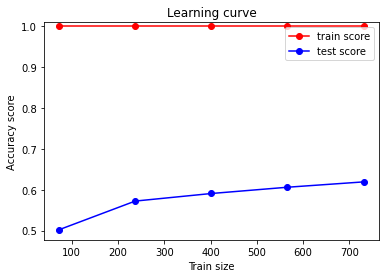

In [2172]:
#Evaluate the model and plot learning curve
model = KNeighborsClassifier(n_neighbors = 11, weights='distance')
model.fit(X_train,y_train)
predicted_y = model.predict(X_test)
acc.loc['K neighbors classifier',('D','Weighting','Test score')] = accuracy_score(y_test, predicted_y)
print('Model test accuracy:', accuracy_score(y_test, predicted_y))
plot_learning_curve(model,X_train,y_train)

#### Accuracy table

In [2208]:
#Obtain a table of accuracies of each model
acc.loc(axis=1)[:,:,'Test score']


A                        \
                       Preliminary Polynomial  Weighting   
                        Test score Test score Test score   
Model                                                      
K neighbors classifier    0.611354   0.616279   0.681223   
Logistic regression       0.593886   0.633721   0.593886   
Neural network            0.676856   0.552326        NaN   
SVM                       0.663755   0.645349   0.628821   
Tree                      0.567686   0.558140   0.589520   

                                                          B             \
                       Weighting and polynomial Preliminary Polynomial   
                                     Test score  Test score Test score   
Model                                                                    
K neighbors classifier                 0.639535    0.637555        NaN   
Logistic regression                    0.610465    0.563319   0.622093   
Neural network                              NaN    0.608536   0.540698   
SVM                                    0.662791    0.655022        NaN   
Tree                                   0.529070         NaN        NaN   

                                            C                        \
                        Weighting Preliminary Polynomial  Weighting   
                       Test score  Test score Test score Test score   
Model                                                                 
K neighbors classifier    0.68559    0.563319        NaN   0.668122   
Logistic regression           NaN    0.593886   0.656977        NaN   
Neural network                NaN    0.638118   0.604651        NaN   
SVM                           NaN    0.672489        NaN        NaN   
Tree                          NaN         NaN        NaN        NaN   

                                 D                        
                       Preliminary Polynomial  Weighting  
                        Test score Test score Test score  
Model                                                     
K neighbors classifier    0.593886        NaN   0.659389  
Logistic regression       0.606987   0.639535        NaN  
Neural network            0.591633   0.500000        NaN  
SVM                       0.593886        NaN        NaN  
Tree                           NaN        NaN        NaN

## 19. Test score

In [2205]:
#Highest test accuracy each model can obtain
acc.loc(axis=1)[:,:,'Test score'].max(axis=1)

Model
K neighbors classifier    0.685590
Logistic regression       0.656977
Neural network            0.676856
SVM                       0.672489
Tree                      0.589520
dtype: float64

In [2206]:
acc.loc(axis=1)[:,:,'Test score'].idxmax(axis=1)

Model
K neighbors classifier      (B, Weighting, Test score)
Logistic regression        (C, Polynomial, Test score)
Neural network            (A, Preliminary, Test score)
SVM                       (C, Preliminary, Test score)
Tree                        (A, Weighting, Test score)
dtype: object

In [2207]:
#Best model and data set
acc.loc['K neighbors classifier',('B','Weighting',('Parameter','Test score'))] 

B  Weighting  Parameter     {'n_neighbors': 11, 'weights': 'distance'}
              Test score                                       0.68559
Name: K neighbors classifier, dtype: object

# Conclusion
Model with the following combination solves the classification problem best
|Model|Hyperparameter|Dataset|Test accuracy|
|---|---|---|---|
|KNeighborsClassifier|n_neighbors = 11, weights='distance'|logX (section B)|0.686|

<br>The accuracy being not high might be due to that
- the data size is not big enough to train a better machine learning model
- the dependent variables are too imbalance where the minority may not well predicted
- data and features may not be adjusted or ready well 